In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.pylab as pylab
import numpy as np

In [2]:
TEAMS= ["ATL", "BOS", "BRK", "CHI", "CHO", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"]
WESTERN_CONF_TEAMS = ["DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC", "PHO", "POR", "SAC", "SAS", "UTA"]
EASTERN_CONF_TEAMS = ["ATL", "BOS", "BRK", "CHI", "CHO", "CLE", "DET", "IND", "MIA", "MIL", "NYK", "ORL", "PHI", "TOR", "WAS"]
ATLANTIC_DIV_TEAMS = ["BOS", "BRK", "NYK", "PHI", "TOR"]
CENTRAL_DIV_TEAMS = ["CHI", "CLE", "DET", "IND", "MIL"]
SOUTHEAST_DIV_TEAMS = ["ATL", "CHO", "MIA", "ORL", "WAS"]
NORTHWEST_DIV_TEAMS = ["DEN", "MIN", "OKC", "POR", "UTA"]
SOUTHWEST_DIV_TEAM = ["GSW", "LAC", "LAL", "PHO", "SAC"]
PACIFIC_DIV_TEAMS = ["DAL", "HOU", "MEM", "NOP", "SAS"]
SEASONS = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
POSITIONS = ["PG", "SG", "SF", "PF", "C"]

In [3]:
def mean(data):
    return sum(data) / len(data)

In [4]:
def variance(data):
    n = len(data)
    avg = mean(data)
    
    deviations = [(x - avg) ** 2 for x in data]
    
    variance = sum(deviations) / n
    return variance

In [5]:
def std(data):
    var = variance(data)
    std = var ** 0.5
    return std

In [6]:
def growth_rate(data):
    straight_line_growth = []
    
    for i in range(1, len(data)):
        growth = (data[i] - data[i-1]) / data[i-1]
        straight_line_growth.append(growth)
        
    growth_rt = sum(straight_line_growth) / len(straight_line_growth)
    
    return "{:.2f}%".format(growth_rt*100)

In [7]:
def format_season(season):
        #Formats years in season to use in File Name
        #Ex: 2021 turns into 2020-21
        first_year = season-1
        second_year = str(season)[2:]
        
        return first_year, second_year

In [8]:
def get_player_df_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))

    return player_df

In [9]:
player_dfs = []

for season in SEASONS:
    player_dfs.append(get_player_df_by_season(season))

    
teste = (player_dfs[20].groupby(['Pos']).mean()['Salary'])

for index, value in teste.items():
    print(index, value)

C 7746809.0275229355
C-PF nan
PF 6559702.0
PF-C 6160421.6
PF-SF 6214043.0
PG 10011582.925
PG-SG 183115.0
SF 7930840.467391305
SF-C 512721.0
SF-PF 4185471.0
SF-SG 1751715.5
SG 5816708.956521739
SG-PG 8078235.5
SG-SF 18500000.0


In [10]:
df = player_dfs[0]
df = df.sort_values(by=['G'], ascending=False)
df = df.drop_duplicates(subset ="Player",keep = "first")
df = df.sort_values(by=['Salary'], ascending=False)
df[:15]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
208,Juwan Howard,PF,26,WAS,82,82,35.5,6.2,13.5,0.459,...,22.2,0.5,1.3,1.9,0.031,-1.4,-1.4,-2.8,-0.6,15000000.0
235,Larry Johnson,PF,30,NYK,70,68,32.6,4.0,9.3,0.433,...,17.0,2.3,2.7,5.1,0.107,0.3,0.4,0.7,1.6,11910000.0
464,Rasheed Wallace,PF,25,POR,81,77,35.1,6.7,12.9,0.519,...,21.9,4.6,4.7,9.3,0.156,1.2,1.0,2.2,3.0,10800000.0
245,Shawn Kemp,C,30,CLE,82,82,30.4,5.9,14.1,0.417,...,30.2,0.2,3.8,4.0,0.077,-1.8,-0.3,-2.1,0.0,10780000.0
427,Damon Stoudamire,PG,26,POR,78,78,30.4,4.9,11.5,0.432,...,21.5,3.6,2.5,6.1,0.124,1.2,-0.3,0.9,1.7,10125000.0
299,Antonio McDyess,PF,25,DEN,81,81,33.3,7.6,15.0,0.507,...,26.9,3.3,2.9,6.2,0.110,0.9,-0.1,0.7,1.9,9900000.0
286,Stephon Marbury,PG,22,NJN,74,74,38.9,7.7,17.8,0.432,...,28.2,6.1,1.2,7.4,0.123,3.8,-1.3,2.4,3.2,9000000.0
460,Antoine Walker,PF,23,BOS,82,82,36.6,7.9,18.4,0.430,...,28.3,2.3,2.7,5.0,0.080,1.8,-1.1,0.7,2.1,9000000.0
185,Anfernee Hardaway,SG,28,PHO,60,60,37.6,6.3,13.3,0.474,...,21.1,4.2,3.6,7.8,0.165,1.9,1.6,3.5,3.1,9000000.0
22,Vin Baker,C,28,SEA,79,75,36.1,6.5,14.3,0.455,...,23.6,1.2,2.2,3.5,0.059,-1.6,-1.5,-3.0,-0.7,9000000.0


In [11]:

avg_salaries_per_pos= {}

for position in POSITIONS:
    avg_salaries_per_pos[position] = []

for i in range(len(SEASONS)):
    
    avg_salaries = player_dfs[i].sort_values(by=['G'], ascending=False)
    avg_salaries = avg_salaries[avg_salaries["Tm"] != "TOT"]
    avg_salaries = avg_salaries.drop_duplicates(subset ="Player",keep = "first")
    avg_salaries = avg_salaries.groupby(['Pos']).mean()['Salary']
    for index, value in avg_salaries.items():
        if index in POSITIONS:
            avg_salaries_per_pos[index].append(value)
        
    
    
avg_salaries_per_pos

{'PG': [3570214.285714286,
  2189594.9367088606,
  2570973.3333333335,
  3460106.3829787234,
  5109600.0,
  5371000.0,
  3345214.6075949366,
  3239887.7702702703,
  3632801.1447368423,
  3877105.5263157897,
  3498425.5802469137,
  3657779.3378378376,
  2759274.894117647,
  3325203.8933333335,
  4096611.4383561644,
  3972732.5714285714,
  4510539.2558139535,
  5691643.101123596,
  7318191.513513514,
  7540409.0813953485,
  9789549.042857142,
  10834614.82278481,
  10086956.96],
 'SG': [3143750.0,
  2779849.0566037735,
  2704200.0,
  3872644.4444444445,
  5586677.419354838,
  6486444.444444444,
  3389385.8333333335,
  3147441.2564102565,
  3211079.65,
  3934499.9487179485,
  3902278.191780822,
  4282460.107142857,
  3512840.188235294,
  3534139.376470588,
  3304366.9523809524,
  3423684.8061224488,
  4070897.2921348317,
  5074420.531914894,
  6949509.976744186,
  5917051.726415094,
  6276351.926315789,
  6291545.786407767,
  6811152.944954128],
 'SF': [2682235.294117647,
  2768776.119402

In [12]:

top_50_salaries_per_season= {}

for position in POSITIONS:
    top_50_salaries_per_season[position] = []

for i in range(len(SEASONS)-1):    
    top_50_salaries = player_dfs[i].sort_values(by=['G'], ascending=False)
    top_50_salaries = top_50_salaries[top_50_salaries["Tm"] != "TOT"]
    top_50_salaries = top_50_salaries.drop_duplicates(subset ="Player",keep = "first")
    top_50_salaries = top_50_salaries.sort_values(by=['Salary'], ascending=False)
    if i == 42:
        print(top_50_salaries)
    top_50_salaries = top_50_salaries[:50].groupby(['Pos']).size()
    for index, value in top_50_salaries.items():
        if index in POSITIONS:
            top_50_salaries_per_season[index].append(value)
        
    
    
top_50_salaries_per_season

{'PG': [8,
  6,
  5,
  4,
  7,
  3,
  7,
  7,
  10,
  7,
  6,
  6,
  6,
  5,
  9,
  11,
  9,
  8,
  11,
  12,
  12,
  16],
 'SG': [6, 6, 8, 9, 12, 9, 9, 9, 5, 8, 8, 12, 6, 7, 4, 5, 7, 8, 10, 8, 7, 9],
 'SF': [7,
  9,
  9,
  8,
  9,
  11,
  9,
  8,
  8,
  9,
  11,
  11,
  12,
  11,
  9,
  11,
  12,
  10,
  6,
  10,
  11,
  7],
 'PF': [15,
  15,
  18,
  13,
  12,
  13,
  16,
  10,
  12,
  13,
  12,
  8,
  11,
  16,
  13,
  8,
  9,
  9,
  8,
  9,
  10,
  12],
 'C': [14,
  14,
  10,
  16,
  10,
  14,
  9,
  16,
  15,
  13,
  13,
  13,
  15,
  11,
  15,
  15,
  13,
  15,
  15,
  11,
  10,
  6]}

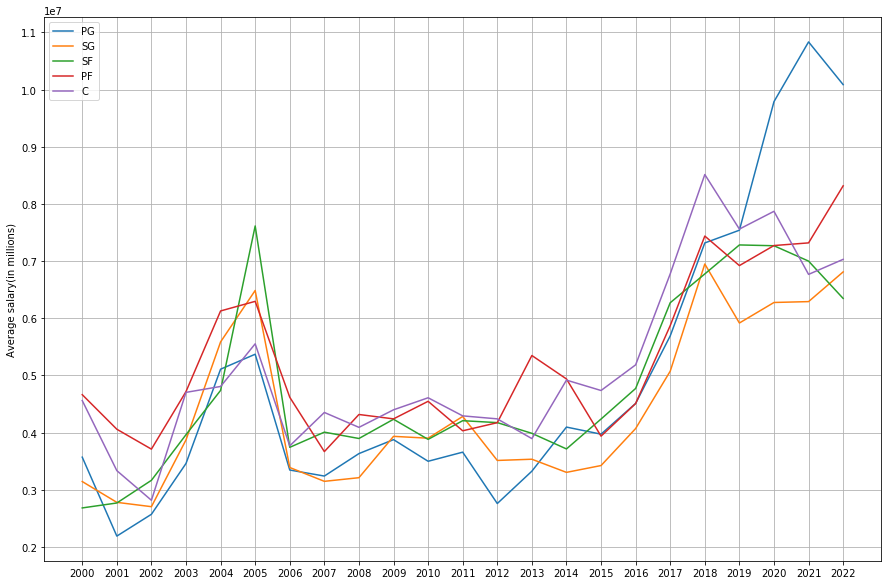

In [13]:
plt.figure(figsize=(15,10))

plt.grid()
for position in POSITIONS:
    plt.plot(SEASONS, avg_salaries_per_pos[position], label=position)
    

plt.xticks(range(2000, 2023))
plt.yticks([2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 11000000])
plt.ylabel("Average salary(in millions)")
plt.legend()
plt.show()

In [14]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 14),
         'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

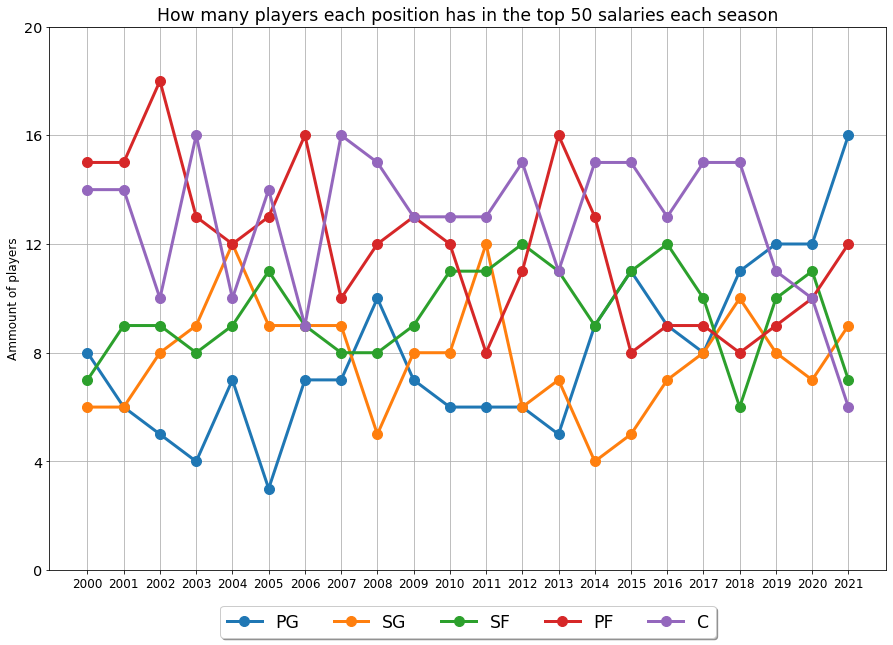

In [15]:
plt.figure(figsize=(15,10))

for position in POSITIONS:
    plt.plot(range(2000, 2022), top_50_salaries_per_season[position], label=position, lw=3, marker='o', ms=10)
    
plt.grid()
plt.xticks(range(2000,2022))
plt.yticks([0, 4, 8, 12, 16, 20])
plt.ylabel("Ammount of players")
plt.title("How many players each position has in the top 50 salaries each season")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()